In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Define dataset path
DATASET_PATH = "/Users/abhaykumar/codeit/projects/healthcare/Pharmaceutical and Biomedical Waste (PBW)"

CATEGORIES = ["(BT) Body Tissue or Organ", "(GE) Glass equipment-packaging 551", "(ME) Metal equipment -packaging", "(OW) Organic wastes", "(PE) Plastic equipment-packaging", "(PP) Paper equipment-packaging", "(SN) Syringe needles", "Gauze", "Gloves", "Mask", "Syringe", "Tweezers"]

print("Folders inside dataset:", os.listdir(DATASET_PATH))



Folders inside dataset: ['(OW) Organic wastes', 'Tweezers', '(PP) Paper equipment-packaging', 'Gauze', '.DS_Store', '(ME) Metal equipment -packaging', '(SN) Syringe needles', '(PE) Plastic equipment-packaging', '(GE) Glass equipment-packaging 551', 'Mask', 'Gloves', 'Syringe', '(BT) Body Tissue or Organ']


In [3]:
for category in os.listdir(DATASET_PATH):
    category_path = os.path.join(DATASET_PATH, category)
    if os.path.isdir(category_path):
        train_path = os.path.join(category_path, "Train images")
        test_path = os.path.join(category_path, "Test images")

        if os.path.exists(train_path):
            print(f"📂 {category} - Train images: {len(os.listdir(train_path))}")
        if os.path.exists(test_path):
            print(f"📂 {category} - Test images: {len(os.listdir(test_path))}")


📂 (OW) Organic wastes - Train images: 468
📂 (OW) Organic wastes - Test images: 117
📂 Tweezers - Train images: 448
📂 Tweezers - Test images: 113
📂 (PP) Paper equipment-packaging - Train images: 410
📂 (PP) Paper equipment-packaging - Test images: 103
📂 Gauze - Train images: 452
📂 Gauze - Test images: 115
📂 (ME) Metal equipment -packaging - Train images: 400
📂 (ME) Metal equipment -packaging - Test images: 100
📂 (SN) Syringe needles - Train images: 476
📂 (SN) Syringe needles - Test images: 119
📂 (PE) Plastic equipment-packaging - Train images: 446
📂 (PE) Plastic equipment-packaging - Test images: 112
📂 (GE) Glass equipment-packaging 551 - Train images: 440
📂 (GE) Glass equipment-packaging 551 - Test images: 111
📂 Mask - Train images: 419
📂 Mask - Test images: 110
📂 Gloves - Train images: 434
📂 Gloves - Test images: 109
📂 Syringe - Train images: 455
📂 Syringe - Test images: 114
📂 (BT) Body Tissue or Organ - Train images: 412
📂 (BT) Body Tissue or Organ - Test images: 104


In [4]:
# Image Parameters
IMG_SIZE = (128, 128) 
BATCH_SIZE = 32

In [5]:
# Apply Data Augmentation only to Training Data
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=25,  
    width_shift_range=0.15,  
    height_shift_range=0.15, 
    shear_range=0.15,        
    zoom_range=0.15,         
    horizontal_flip=True,   
    fill_mode='nearest',
    validation_split=0.2  
)

val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Create Data Generators
train_generator = train_datagen.flow_from_directory(
    DATASET_PATH,  
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = val_datagen.flow_from_directory(
    DATASET_PATH, 
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


# Convert to tf.data.Dataset with Static Batch Size
train_ds = tf.data.Dataset.from_generator(
    lambda: train_generator, 
    output_signature=(
        tf.TensorSpec(shape=(BATCH_SIZE, *IMG_SIZE, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(BATCH_SIZE, train_generator.num_classes), dtype=tf.float32)
    )
).cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_generator(
    lambda: val_generator, 
    output_signature=(
        tf.TensorSpec(shape=(BATCH_SIZE, *IMG_SIZE, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(BATCH_SIZE, val_generator.num_classes), dtype=tf.float32)
    )
).cache().prefetch(buffer_size=tf.data.AUTOTUNE)  # Removed shuffle()

print(f"✅ Dataset Loaded & Optimized! {train_generator.num_classes} classes detected.")

Found 5273 images belonging to 12 classes.
Found 1313 images belonging to 12 classes.
✅ Dataset Loaded & Optimized! 12 classes detected.


In [6]:
for x, y in train_generator:
    print(x.shape, y.shape)  # Check batch sizes
    break


(32, 128, 128, 3) (32, 12)


In [7]:
print(train_generator.class_indices)  # See class labels  
print(train_generator.classes)  # Check class distribution  


{'(BT) Body Tissue or Organ': 0, '(GE) Glass equipment-packaging 551': 1, '(ME) Metal equipment -packaging': 2, '(OW) Organic wastes': 3, '(PE) Plastic equipment-packaging': 4, '(PP) Paper equipment-packaging': 5, '(SN) Syringe needles': 6, 'Gauze': 7, 'Gloves': 8, 'Mask': 9, 'Syringe': 10, 'Tweezers': 11}
[ 0  0  0 ... 11 11 11]


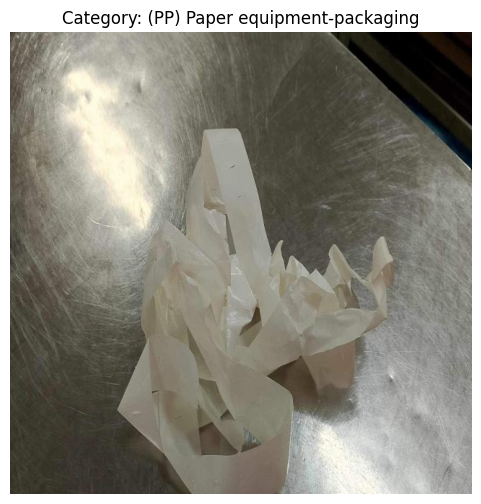

In [8]:
import matplotlib.pyplot as plt
import cv2
import random

# Select a category (folder)
category = random.choice(os.listdir(DATASET_PATH)) 
category_path = os.path.join(DATASET_PATH, category)

# Select a random image from the category
image_name = random.choice(os.listdir(os.path.join(category_path, "Train images")))  # Change folder name if needed
image_path = os.path.join(category_path, "Train images", image_name)

# Load and display the image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 

plt.figure(figsize=(6,6))
plt.imshow(image)
plt.title(f"Category: {category}")
plt.axis("off")  # Hide axis
plt.show()


In [9]:
print(f"Image shape: {image.shape}")  # Ensure (H, W, 3)


Image shape: (640, 640, 3)


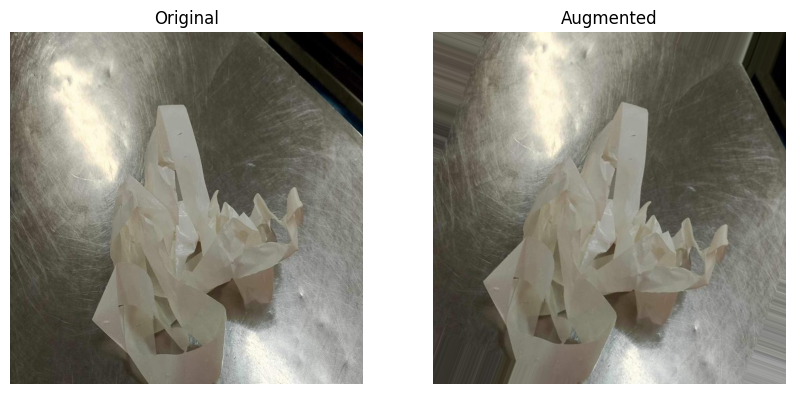

In [10]:
augmented_image = train_datagen.random_transform(image)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image)
axes[0].set_title("Original")
axes[0].axis("off")

axes[1].imshow(augmented_image)
axes[1].set_title("Augmented")
axes[1].axis("off")

plt.show()


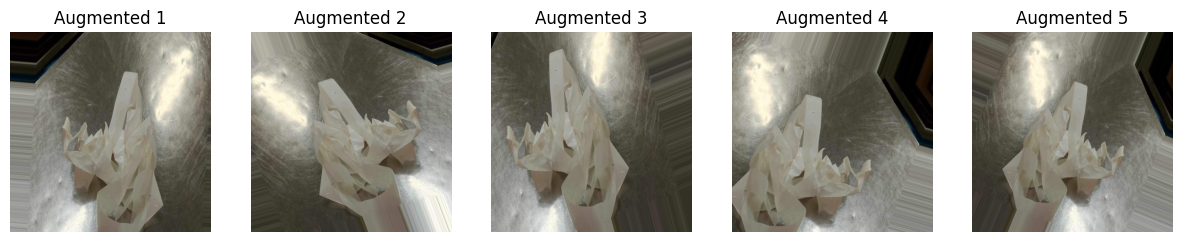

In [11]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i in range(5):
    augmented_image = train_datagen.random_transform(image)
    axes[i].imshow(augmented_image)
    axes[i].set_title(f"Augmented {i+1}")
    axes[i].axis("off")

plt.show()


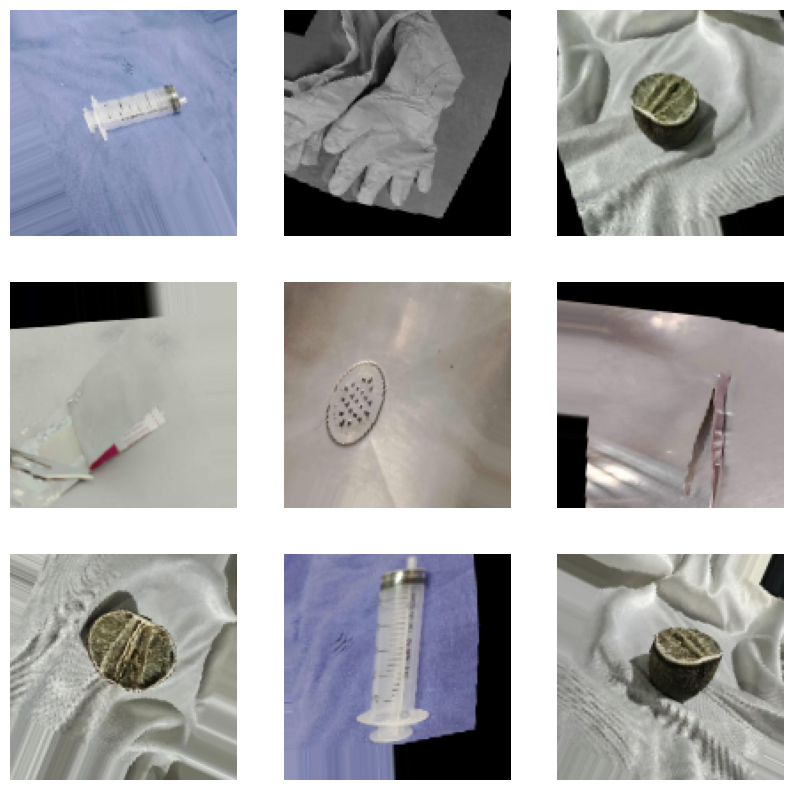

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming train_generator is already defined
iterator = iter(train_generator) #create iterator object
sample_batch = next(iterator) #use next on iterator
images = sample_batch[0]

plt.figure(figsize=(10, 10))
for i in range(min(9, images.shape[0])): #added shape check
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.axis("off")
plt.show()

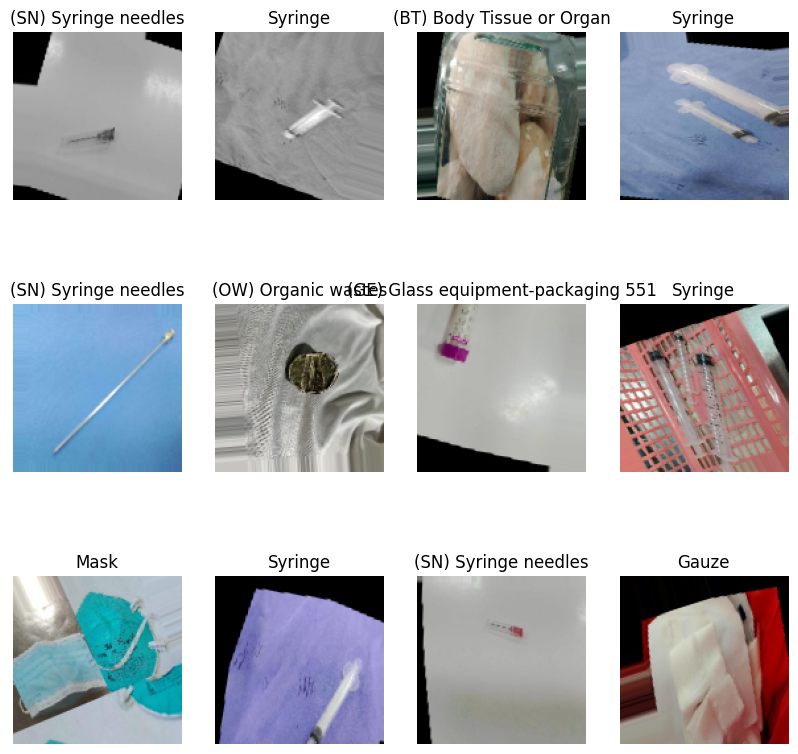

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Get class names from the training generator
class_names = list(train_generator.class_indices.keys())

# Fetch one batch of images and labels
image_batch, labels_batch = next(train_generator)  # Get a batch of images

# Plot the images
plt.figure(figsize=(10, 10))
for i in range(12):  # Adjust according to your batch size if needed
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(image_batch[i])  # Images are already scaled (rescaled by 1./255)
    
    # Find the class label
    label_index = np.argmax(labels_batch[i])  # Get the class index
    plt.title(class_names[label_index])  # Get class name using index
    
    plt.axis("off")

plt.show()


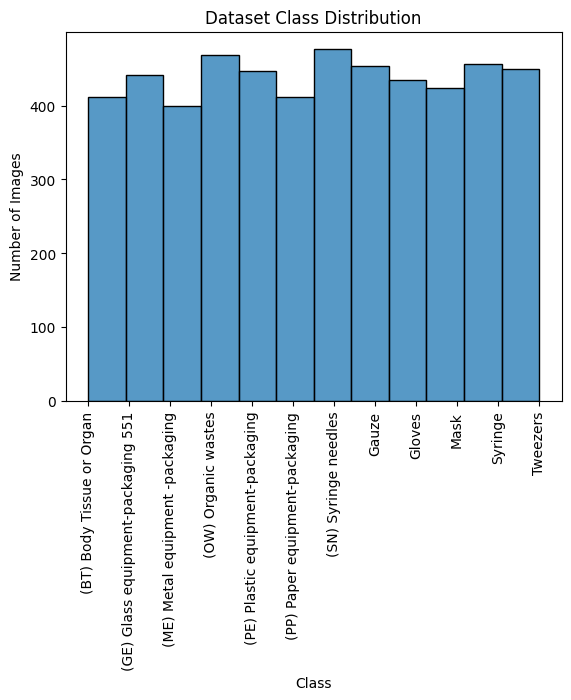

In [13]:
import seaborn as sns

labels = train_generator.classes
sns.histplot(labels, bins=len(train_generator.class_indices), kde=False)
plt.xticks(range(len(train_generator.class_indices)), train_generator.class_indices.keys(), rotation=90)
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Dataset Class Distribution")
plt.show()


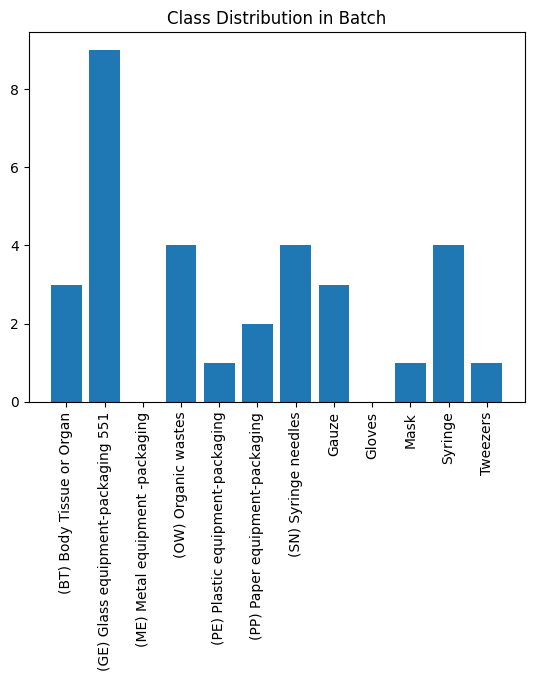

In [14]:
class_counts = np.sum(labels_batch, axis=0)
plt.bar(class_names, class_counts)
plt.xticks(rotation=90)
plt.title("Class Distribution in Batch")
plt.show()


In [15]:
image_batch, label_batch = next(iter(train_generator))
print(f"Train Batch Shape: {image_batch.shape}")  # Should be (BATCH_SIZE, IMG_SIZE[0], IMG_SIZE[1], 3)
print(f"Label Shape: {label_batch.shape}")  # Should be (BATCH_SIZE, num_classes)


Train Batch Shape: (32, 128, 128, 3)
Label Shape: (32, 12)


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3), kernel_regularizer=l2(0.00005)),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.00005)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.00005)),
    BatchNormalization(),
    Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.00005)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    
    Conv2D(256, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.00005)),
    BatchNormalization(),
    Conv2D(256, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.00005)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(512, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.00005)),
    BatchNormalization(),
    Conv2D(512, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.00005)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    GlobalAveragePooling2D(),  # Replace Flatten

    Dense(256, activation='relu', kernel_regularizer=l2(0.00005)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=l2(0.00005)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(len(train_generator.class_indices), activation='softmax')  
])

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 16, 16, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 16, 16, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 512)            │             

 Total params: 4,860,364 (18.54 MB)

 Trainable params: 4,855,756 (18.52 MB)

 Non-trainable params: 4,608 (18.00 KB)

In [37]:
x_batch, y_batch = next(iter(train_generator))
print(f"Train batch shape: {x_batch.shape}, Label shape: {y_batch.shape}")


Train batch shape: (32, 128, 128, 3), Label shape: (32, 12)


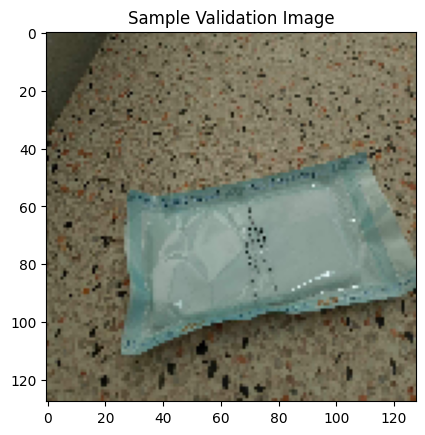

In [38]:
val_batch = next(iter(val_generator))
plt.imshow(val_batch[0][0])  # Show first validation image
plt.title("Sample Validation Image")
plt.show()


In [39]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Reduce Learning Rate if Validation Loss Stops Improving
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,  # Reduce from 5 to 3 for faster adjustments
    min_lr=1e-6,
    verbose=1
)

# Stop Training if Validation Loss Doesn't Improve
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,  # Reduce from 10 to 5 for early stopping
    restore_best_weights=True,
    verbose=1
)

# Set Steps per Epoch (How many batches per epoch)
steps_per_epoch = len(train_generator)
validation_steps = len(val_generator)

# Train Model
history = model.fit(
    train_generator,  # Using generator, not train_ds
    validation_data=val_generator,
    epochs=50,  # Set high, but early stopping will handle it
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=[reduce_lr, early_stopping]
)


Epoch 1/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 426s 3s/step - accuracy: 0.3880 - loss: 2.1018 - val_accuracy: 0.0906 - val_loss: 3.1583 - learning_rate: 1.0000e-04
Epoch 2/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 438s 3s/step - accuracy: 0.6154 - loss: 1.2798 - val_accuracy: 0.0769 - val_loss: 3.5138 - learning_rate: 1.0000e-04
Epoch 3/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 440s 3s/step - accuracy: 0.6790 - loss: 1.1060 - val_accuracy: 0.2681 - val_loss: 2.3365 - learning_rate: 1.0000e-04
Epoch 4/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 447s 3s/step - accuracy: 0.7174 - loss: 0.9765 - val_accuracy: 0.5072 - val_loss: 1.7654 - learning_rate: 1.0000e-04
Epoch 5/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 449s 3s/step - accuracy: 0.7786 - loss: 0.7966 - val_accuracy: 0.7220 - val_loss: 0.9836 - learning_rate: 1.0000e-04
Epoch 6/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 455s 3s/step - accuracy: 0.7937 - loss: 0.7376 - val_accuracy: 0.5689 - val_loss: 1.8183 - learning_rate: 1.0000e-04
Epoch 7/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 453s 3s/step - acc

In [40]:
import json

with open("training_history.json", "w") as f:
    json.dump(history.history, f)


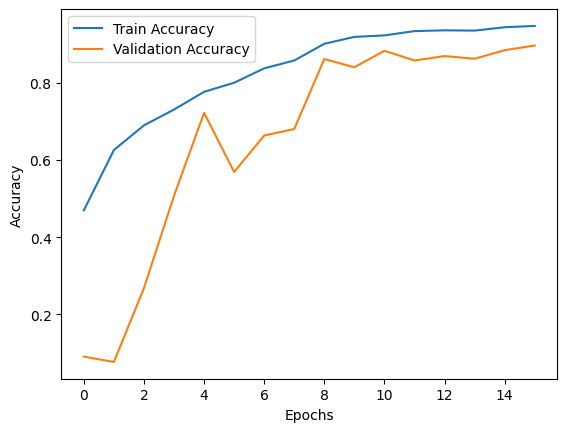

In [42]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


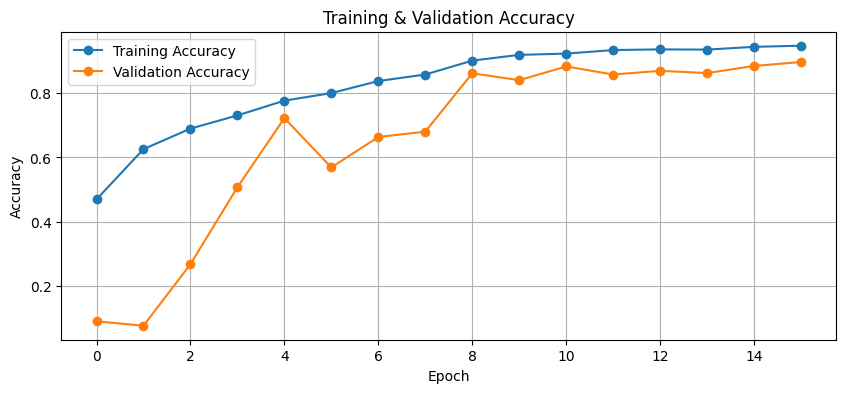

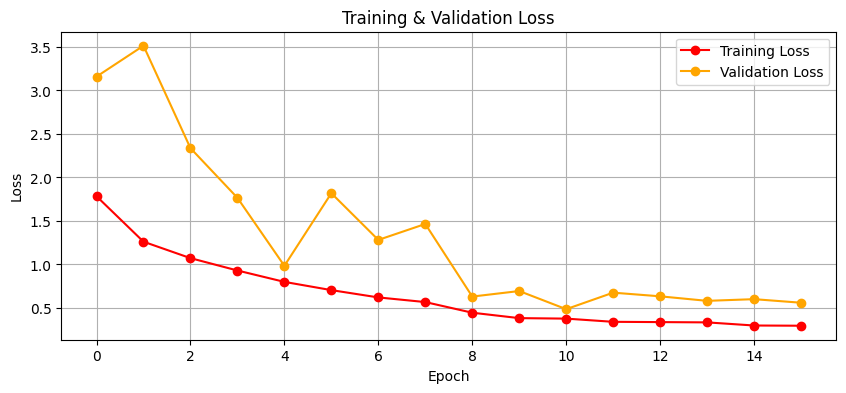

In [41]:
import matplotlib.pyplot as plt

# Plot Training & Validation Accuracy
plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training & Validation Loss
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Training Loss', marker='o', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [43]:
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_accuracy:.2%}")


42/42 ━━━━━━━━━━━━━━━━━━━━ 22s 512ms/step - accuracy: 0.8876 - loss: 0.4673
Validation Accuracy: 88.27%


In [65]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 165}

Found 6586 images belonging to 12 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


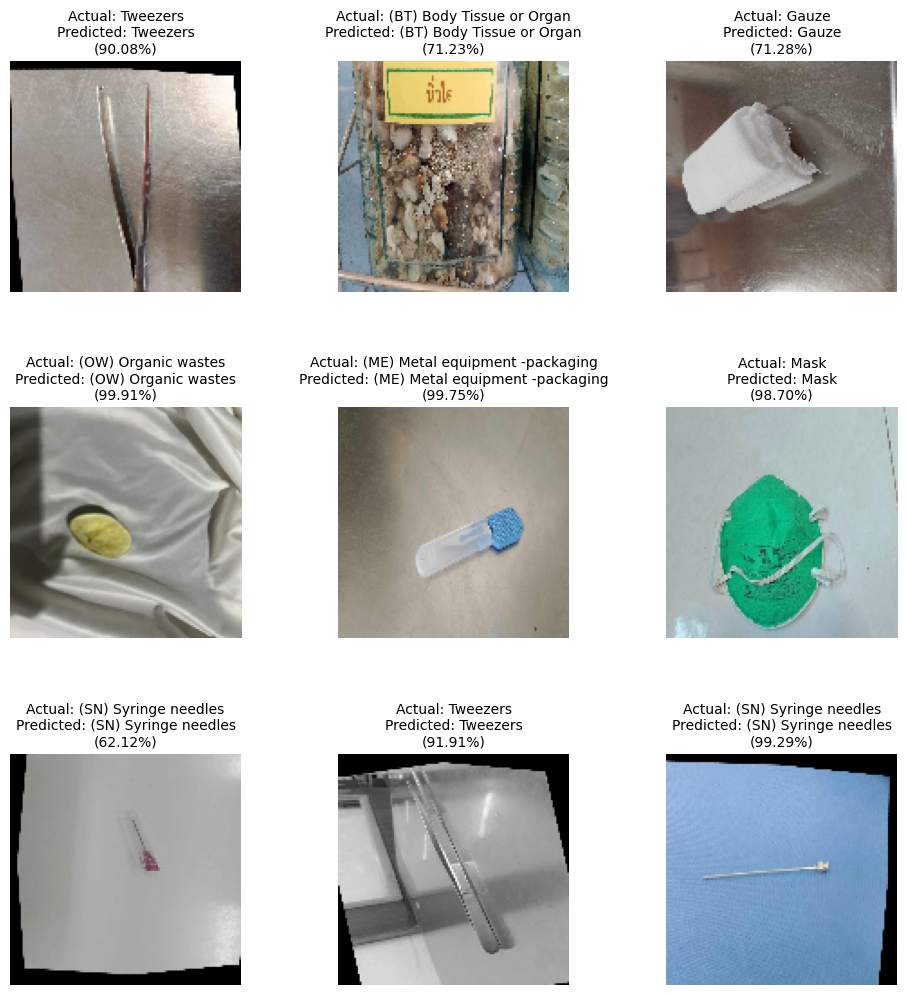

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define test image directory
test_dir = "/Users/abhaykumar/codeit/projects/healthcare/Pharmaceutical and Biomedical Waste (PBW)"  # Replace with the actual path

# Create test data generator (Only Rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load test images in batches
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE[0], IMG_SIZE[1]),  # Same size as training
    batch_size=9,  # 🔹 Load 9 images at a time
    class_mode='categorical',
    shuffle=True  # 🔹 Shuffle to get random images each time
)

# Get class names
class_names = list(test_generator.class_indices.keys())

# Get a batch of test images and their true labels
images_batch, labels_batch = next(test_generator)

# Predict on the batch
predictions = model.predict(images_batch)

# Plot the images with actual vs predicted labels
fig, axes = plt.subplots(3, 3, figsize=(12, 12))  # 3x3 Grid
fig.subplots_adjust(hspace=0.5)  # Adjust space between rows

for i, ax in enumerate(axes.flat):
    ax.imshow(images_batch[i])  # Display image
    ax.axis("off")

    true_label = class_names[np.argmax(labels_batch[i])]
    predicted_label = class_names[np.argmax(predictions[i])]
    confidence = np.max(predictions[i]) * 100  # Confidence Score

    ax.set_title(f"Actual: {true_label}\nPredicted: {predicted_label}\n({confidence:.2f}%)", fontsize=10)

plt.show()


In [46]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define test data generator (without augmentation, only rescaling)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Define test_generator
test_generator = test_datagen.flow_from_directory(
    directory=DATASET_PATH,  # Change this to the correct test dataset path
    target_size=(128, 128),  # Use the same size as the model input
    batch_size=32,
    class_mode="categorical",
    shuffle=False  # Don't shuffle test data for consistent evaluation
)


Found 6586 images belonging to 12 classes.


In [47]:
print(f"Found {test_generator.samples} test images across {test_generator.num_classes} classes.")


Found 6586 test images across 12 classes.


In [48]:
print(test_generator.class_indices)

{'(BT) Body Tissue or Organ': 0, '(GE) Glass equipment-packaging 551': 1, '(ME) Metal equipment -packaging': 2, '(OW) Organic wastes': 3, '(PE) Plastic equipment-packaging': 4, '(PP) Paper equipment-packaging': 5, '(SN) Syringe needles': 6, 'Gauze': 7, 'Gloves': 8, 'Mask': 9, 'Syringe': 10, 'Tweezers': 11}


In [52]:
batch = next(iter(test_generator))
print(batch[0].shape)  # Should be (batch_size, 224, 224, 3)


(32, 128, 128, 3)


In [53]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"✅ Test Accuracy: {test_accuracy:.2f}, Test Loss: {test_loss:.2f}")


206/206 ━━━━━━━━━━━━━━━━━━━━ 118s 572ms/step - accuracy: 0.9226 - loss: 0.3615
✅ Test Accuracy: 0.94, Test Loss: 0.32


In [72]:
import os

test_dir = "/Users/abhaykumar/codeit/projects/healthcare/Pharmaceutical and Biomedical Waste (PBW)"

if not os.path.exists(test_dir):
    print("❌ ERROR: Test directory does not exist!")
else:
    print("✅ Test directory exists")
    print("Classes found:", os.listdir(test_dir))


✅ Test directory exists
Classes found: ['(OW) Organic wastes', 'Tweezers', '(PP) Paper equipment-packaging', 'Gauze', '.DS_Store', '(ME) Metal equipment -packaging', '(SN) Syringe needles', '(PE) Plastic equipment-packaging', '(GE) Glass equipment-packaging 551', 'Mask', 'Gloves', 'Syringe', '(BT) Body Tissue or Organ']


In [73]:
import os
print("✅ Test Directory Exists:", os.path.exists(test_dir))
print("📂 Subdirectories:", os.listdir(test_dir))


✅ Test Directory Exists: True
📂 Subdirectories: ['(OW) Organic wastes', 'Tweezers', '(PP) Paper equipment-packaging', 'Gauze', '.DS_Store', '(ME) Metal equipment -packaging', '(SN) Syringe needles', '(PE) Plastic equipment-packaging', '(GE) Glass equipment-packaging 551', 'Mask', 'Gloves', 'Syringe', '(BT) Body Tissue or Organ']


In [54]:
print("✅ Model expects input shape:", model.input_shape)


✅ Model expects input shape: (None, 128, 128, 3)


In [55]:
subdirs = os.listdir(test_dir)
if len(subdirs) == 0:
    print("❌ ERROR: Test directory is empty!")
else:
    print("✅ Found class folders:", subdirs)


✅ Found class folders: ['(OW) Organic wastes', 'Tweezers', '(PP) Paper equipment-packaging', 'Gauze', '.DS_Store', '(ME) Metal equipment -packaging', '(SN) Syringe needles', '(PE) Plastic equipment-packaging', '(GE) Glass equipment-packaging 551', 'Mask', 'Gloves', 'Syringe', '(BT) Body Tissue or Organ']


In [56]:
import os
from tensorflow.keras.preprocessing.image import load_img

# Get the first valid class folder (ignoring system files)
subdirs = [d for d in os.listdir(test_dir) if not d.startswith('.') and os.path.isdir(os.path.join(test_dir, d))]

if not subdirs:
    print("❌ ERROR: No valid class folders found!")
else:
    sample_class_path = os.path.join(test_dir, subdirs[0])  # Pick first class folder

    # Ensure the "Test" folder exists inside the class folder
    test_folder_path = os.path.join(sample_class_path, "Test images")
    if not os.path.exists(test_folder_path):
        print(f"❌ ERROR: 'Test' folder not found in {sample_class_path}")
    else:
        # Get the first valid image inside the "Test" folder
        valid_extensions = ('.jpg', '.jpeg', '.png')
        images = [img for img in os.listdir(test_folder_path) if img.endswith(valid_extensions)]

        if not images:
            print(f"❌ ERROR: No valid images found in {test_folder_path}")
        else:
            sample_image = os.path.join(test_folder_path, images[0])
            try:
                img = load_img(sample_image, target_size=(224, 224))
                print("✅ Image loaded successfully:", sample_image)
            except Exception as e:
                print("❌ ERROR loading image:", e)


✅ Image loaded successfully: /Users/abhaykumar/codeit/projects/healthcare/Pharmaceutical and Biomedical Waste (PBW)/(OW) Organic wastes/Test images/S__8667179_jpg.rf.5ffe47c52d887ad988212a14a01fd417.jpg


206/206 ━━━━━━━━━━━━━━━━━━━━ 122s 591ms/step


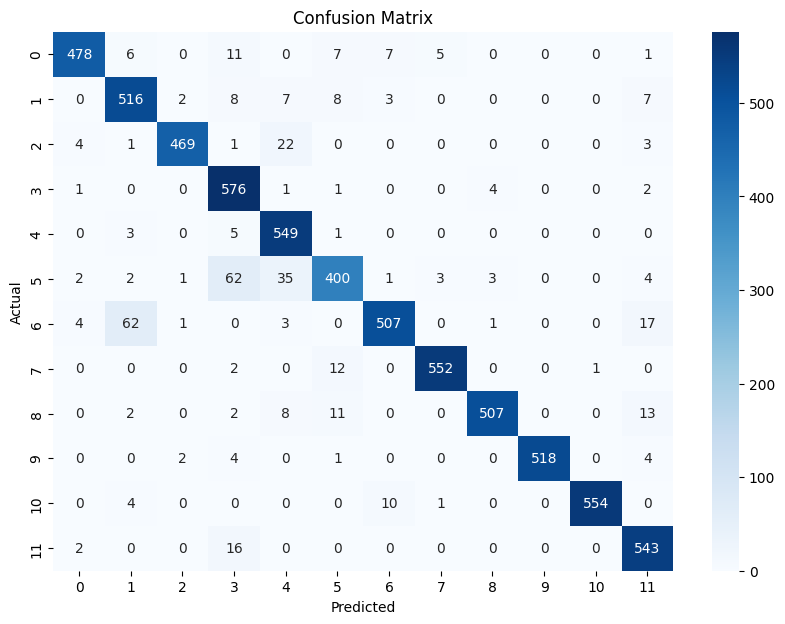

                                    precision    recall  f1-score   support

         (BT) Body Tissue or Organ       0.97      0.93      0.95       515
(GE) Glass equipment-packaging 551       0.87      0.94      0.90       551
   (ME) Metal equipment -packaging       0.99      0.94      0.96       500
               (OW) Organic wastes       0.84      0.98      0.91       585
  (PE) Plastic equipment-packaging       0.88      0.98      0.93       558
    (PP) Paper equipment-packaging       0.91      0.78      0.84       513
              (SN) Syringe needles       0.96      0.85      0.90       595
                             Gauze       0.98      0.97      0.98       567
                            Gloves       0.98      0.93      0.96       543
                              Mask       1.00      0.98      0.99       529
                           Syringe       1.00      0.97      0.99       569
                          Tweezers       0.91      0.97      0.94       561

          

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Get true labels & predictions
y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred, target_names=list(test_generator.class_indices.keys())))


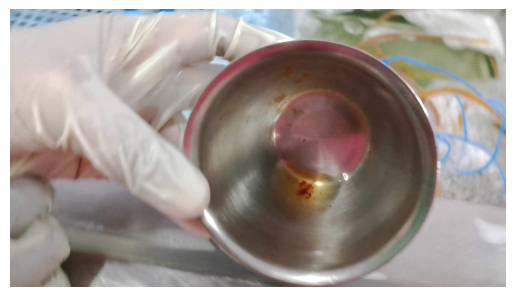

In [58]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

sample_image_path = "/Users/abhaykumar/codeit/projects/healthcare/Pharmaceutical and Biomedical Waste (PBW)/(BT) Body Tissue or Organ/Test images/LINE_ALBUM_191266_๒๓๑๒๑๙_87.jpg"
img = load_img(sample_image_path)
plt.imshow(img)
plt.axis("off")
plt.show()


In [80]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Set your test images directory
test_images_dir = "/Users/abhaykumar/codeit/projects/healthcare/Pharmaceutical and Biomedical Waste (PBW)/(BT) Body Tissue or Organ/Test images"

# Get all image paths
image_paths = [os.path.join(test_images_dir, img) for img in os.listdir(test_images_dir) if img.endswith(('.jpg', '.png', '.jpeg'))]

# Function to check if an image is black
def is_black_image(image_path, threshold=5):
    img = load_img(image_path)
    img_array = img_to_array(img)
    
    # Convert to grayscale
    gray_img = np.mean(img_array, axis=-1)
    
    # Check if all pixel values are below a threshold (almost black)
    return np.max(gray_img) < threshold

# Loop through images and display black ones
black_images = []
for img_path in image_paths:
    if is_black_image(img_path):
        black_images.append(img_path)

# Show results
print(f"🔍 Found {len(black_images)} black images!")
for img_path in black_images[:10]:  # Show only first 10
    img = load_img(img_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Black Image: {os.path.basename(img_path)}")
    plt.show()


🔍 Found 0 black images!


206/206 ━━━━━━━━━━━━━━━━━━━━ 122s 591ms/step


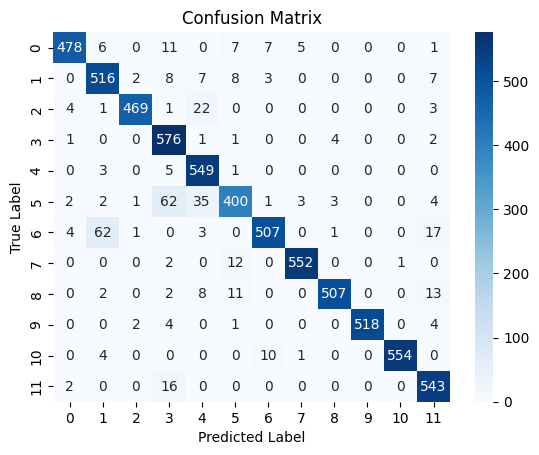

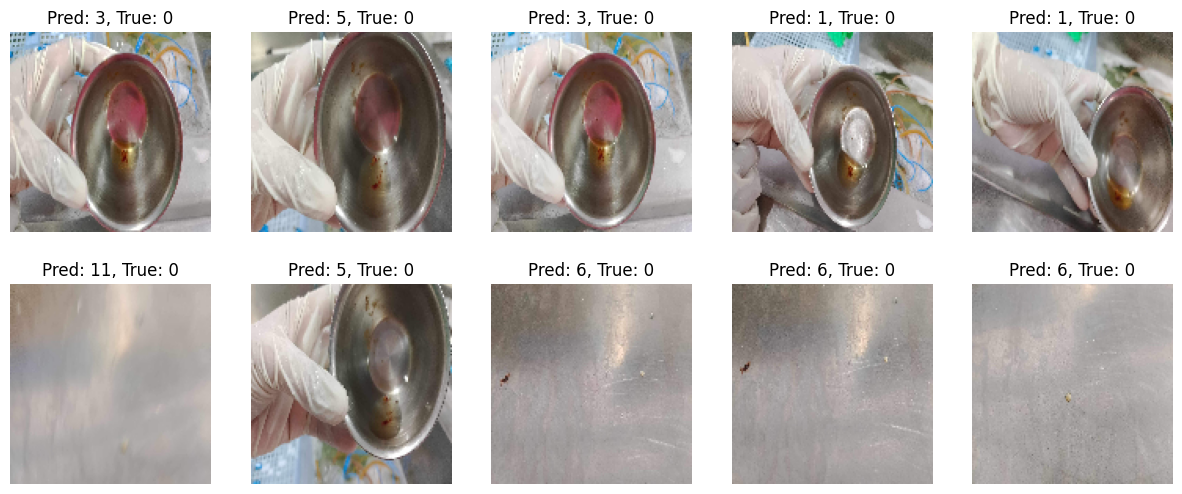

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions and true labels
y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=1)

# Compute Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Find misclassified images
misclassified_indices = np.where(y_pred != y_true)[0]

# Display a few misclassified images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# Manually extract images from the generator
for i, ax in enumerate(axes.flat):
    if i >= len(misclassified_indices): 
        break
    
    batch_index = misclassified_indices[i] // test_generator.batch_size
    img_index = misclassified_indices[i] % test_generator.batch_size
    
    # Load the corresponding batch
    batch_images, batch_labels = test_generator[batch_index]
    
    # Extract the misclassified image
    img = batch_images[img_index]  
    
    # Convert back to [0,255] range if necessary
    if img.max() <= 1.0:
        img = (img * 255).astype("uint8")
    
    ax.imshow(img)
    ax.set_title(f"Pred: {y_pred[misclassified_indices[i]]}, True: {y_true[misclassified_indices[i]]}")
    ax.axis("off")

plt.show()


In [60]:
import numpy as np
print(np.bincount(y_true))  # Shows the count of images in each class


[515 551 500 585 558 513 595 567 543 529 569 561]


In [61]:
import numpy as np

# Get misclassified indices
misclassified_indices = np.where(y_pred != y_true)[0]

# Get filenames from test_generator
misclassified_filenames = [test_generator.filenames[i] for i in misclassified_indices]

# Print some misclassified filenames
print(misclassified_filenames[:10])  # Show first 10 misclassified images


['(BT) Body Tissue or Organ/Test images/LINE_ALBUM_191266_๒๓๑๒๑๙_100.jpg', '(BT) Body Tissue or Organ/Test images/LINE_ALBUM_191266_๒๓๑๒๑๙_101.jpg', '(BT) Body Tissue or Organ/Test images/LINE_ALBUM_191266_๒๓๑๒๑๙_102.jpg', '(BT) Body Tissue or Organ/Test images/LINE_ALBUM_191266_๒๓๑๒๑๙_104.jpg', '(BT) Body Tissue or Organ/Test images/LINE_ALBUM_191266_๒๓๑๒๑๙_105.jpg', '(BT) Body Tissue or Organ/Test images/LINE_ALBUM_191266_๒๓๑๒๑๙_108.jpg', '(BT) Body Tissue or Organ/Test images/LINE_ALBUM_191266_๒๓๑๒๑๙_110.jpg', '(BT) Body Tissue or Organ/Test images/LINE_ALBUM_191266_๒๓๑๒๑๙_111.jpg', '(BT) Body Tissue or Organ/Test images/LINE_ALBUM_191266_๒๓๑๒๑๙_118.jpg', '(BT) Body Tissue or Organ/Test images/LINE_ALBUM_191266_๒๓๑๒๑๙_119.jpg']


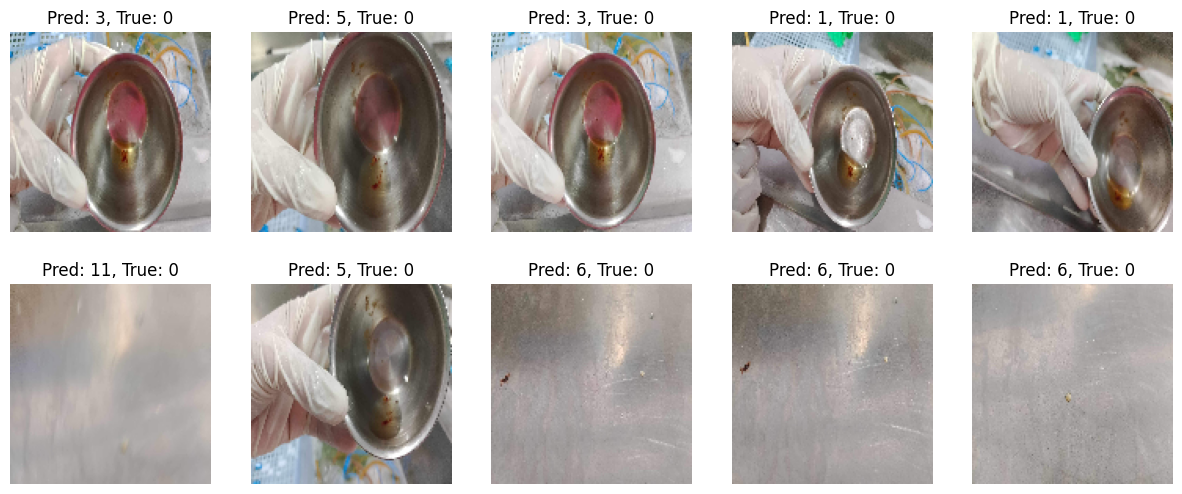

In [62]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i, ax in enumerate(axes.flat):
    if i >= len(misclassified_indices): 
        break
    
    batch_index = misclassified_indices[i] // test_generator.batch_size
    img_index = misclassified_indices[i] % test_generator.batch_size
    
    batch_images, batch_labels = test_generator[batch_index]
    img = batch_images[img_index]  

    if img.max() <= 1.0:
        img = (img * 255).astype("uint8")
    
    ax.imshow(img)
    ax.set_title(f"Pred: {y_pred[misclassified_indices[i]]}, True: {y_true[misclassified_indices[i]]}")
    ax.axis("off")

plt.show()


In [63]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))


                                    precision    recall  f1-score   support

         (BT) Body Tissue or Organ       0.97      0.93      0.95       515
(GE) Glass equipment-packaging 551       0.87      0.94      0.90       551
   (ME) Metal equipment -packaging       0.99      0.94      0.96       500
               (OW) Organic wastes       0.84      0.98      0.91       585
  (PE) Plastic equipment-packaging       0.88      0.98      0.93       558
    (PP) Paper equipment-packaging       0.91      0.78      0.84       513
              (SN) Syringe needles       0.96      0.85      0.90       595
                             Gauze       0.98      0.97      0.98       567
                            Gloves       0.98      0.93      0.96       543
                              Mask       1.00      0.98      0.99       529
                           Syringe       1.00      0.97      0.99       569
                          Tweezers       0.91      0.97      0.94       561

          

In [64]:
import os

# Define the model save directory
save_dir = "/Users/abhaykumar/codeit/projects/healthcare/models"

# Get the highest model version number
model_version = max([int(i) for i in os.listdir(save_dir) if i.isdigit()] + [0]) + 1

# Ensure the directory exists
os.makedirs(save_dir, exist_ok=True)

# Save in Keras recommended format (`.keras`)
keras_path = os.path.join(save_dir, f"{model_version}.keras")
model.save(keras_path)  
print(f"✅ Model saved in Keras format at: {keras_path}")

# Save in HDF5 format (`.h5`)
h5_path = os.path.join(save_dir, f"{model_version}.h5")
model.save(h5_path)
print(f"✅ Model saved in HDF5 format at: {h5_path}")


✅ Model saved in Keras format at: /Users/abhaykumar/codeit/projects/healthcare/models/1.keras
✅ Model saved in HDF5 format at: /Users/abhaykumar/codeit/projects/healthcare/models/1.h5


In [65]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model("/Users/abhaykumar/codeit/projects/healthcare/models/1.h5")

# Check model summary
model.summary()

# Evaluate on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 16, 16, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 16, 16, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 512)            │             

 Total params: 4,860,366 (18.54 MB)

 Trainable params: 4,855,756 (18.52 MB)

 Non-trainable params: 4,608 (18.00 KB)

 Optimizer params: 2 (12.00 B)

206/206 ━━━━━━━━━━━━━━━━━━━━ 123s 597ms/step - accuracy: 0.9226 - loss: 0.3615
Test Accuracy: 93.67%


In [66]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model_path = "/Users/abhaykumar/codeit/projects/healthcare/models/1.h5"  # 🔹 Update this path
model = load_model(model_path)
print("✅ Model Loaded Successfully!")


✅ Model Loaded Successfully!


In [67]:
test_dataset_path = "/Users/abhaykumar/codeit/projects/healthcare/Pharmaceutical and Biomedical Waste (PBW)"  # 🔹 Update this path
CATEGORIES = ["(BT) Body Tissue or Organ", "(GE) Glass equipment-packaging 551", "(ME) Metal equipment -packaging", 
              "(OW) Organic wastes", "(PE) Plastic equipment-packaging", "(PP) Paper equipment-packaging", 
              "(SN) Syringe needles", "Gauze", "Gloves", "Mask", "Syringe", "Tweezers"]


In [68]:
def preprocess_image(img_path, img_size=(128, 128)):  # Adjust size if needed
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize to [0,1]
    return img_array


In [69]:
def evaluate_model(test_dir, img_size=(128, 128)):
    y_true = []
    y_pred = []
    
    for label_index, category in enumerate(CATEGORIES):
        class_path = os.path.join(test_dir, category, "Test images")  # 🔹 Test images folder
        if not os.path.exists(class_path):
            print(f"⚠️ Skipping {category} (No test images found!)")
            continue

        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)

            # Ensure it's an image file
            if not img_file.lower().endswith((".jpg", ".png", ".jpeg")):
                continue
            
            img_array = preprocess_image(img_path, img_size)
            prediction = model.predict(img_array)
            predicted_label = np.argmax(prediction)  # Get highest probability index

            y_true.append(label_index)  # True class index
            y_pred.append(predicted_label)  # Predicted class index

    return y_true, y_pred


In [92]:
y_true, y_pred = evaluate_model(test_dataset_path)
print("✅ Evaluation Complete!")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━

In [70]:

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
accuracy = accuracy_score(y_true, y_pred)
print(f"🎯 Model Accuracy: {accuracy * 100:.2f}%")

🎯 Model Accuracy: 93.67%


In [71]:
print("📊 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=CATEGORIES))


📊 Classification Report:

                                    precision    recall  f1-score   support

         (BT) Body Tissue or Organ       0.97      0.93      0.95       515
(GE) Glass equipment-packaging 551       0.87      0.94      0.90       551
   (ME) Metal equipment -packaging       0.99      0.94      0.96       500
               (OW) Organic wastes       0.84      0.98      0.91       585
  (PE) Plastic equipment-packaging       0.88      0.98      0.93       558
    (PP) Paper equipment-packaging       0.91      0.78      0.84       513
              (SN) Syringe needles       0.96      0.85      0.90       595
                             Gauze       0.98      0.97      0.98       567
                            Gloves       0.98      0.93      0.96       543
                              Mask       1.00      0.98      0.99       529
                           Syringe       1.00      0.97      0.99       569
                          Tweezers       0.91      0.97      

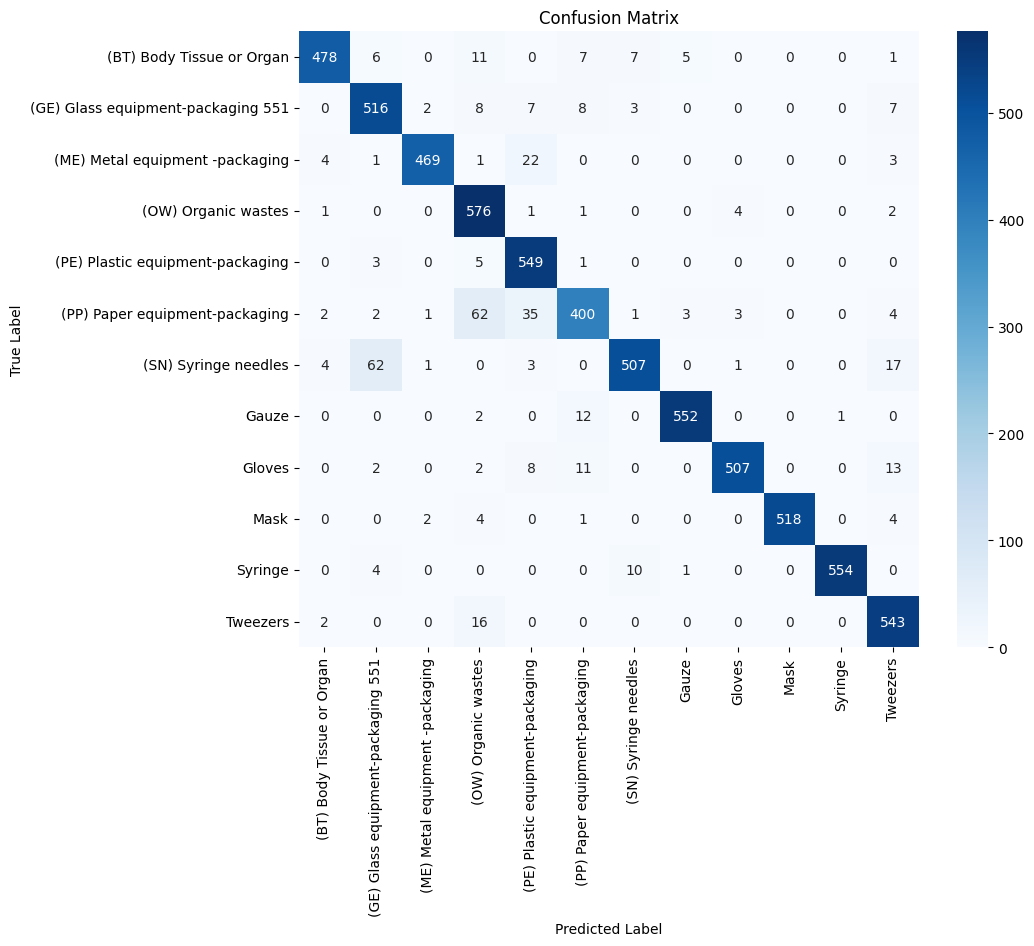

In [72]:
import seaborn as sns
plt.figure(figsize=(10, 8))
conf_matrix = confusion_matrix(y_true, y_pred)

sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


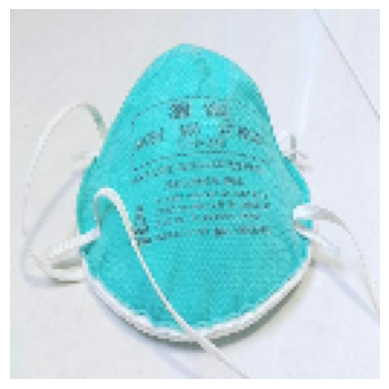

In [73]:
img_path = "/Users/abhaykumar/codeit/projects/healthcare/Pharmaceutical and Biomedical Waste (PBW)/Mask/Test images/LINE_ALBUM_-_-_65_jpg.rf.7061926ef3d8024e8fb2a3fa06d6ef91.jpg"  # Update this with your image path
img = image.load_img(img_path, target_size=(128, 128))  # Resize image
plt.imshow(img)  # Show the image
plt.axis("off")
plt.show()

# Convert image to array
img_array = image.img_to_array(img)  
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize (if needed, based on how your model was trained)


In [92]:
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)[0]  # Get the index of the highest probability
predicted_label = CATEGORIES[predicted_class]  # Get class label
print(f"Predicted Class: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted Class: Mask


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
Top Predictions:
(ME) Metal equipment -packaging: 95.01%
Mask: 2.16%
(BT) Body Tissue or Organ: 0.76%


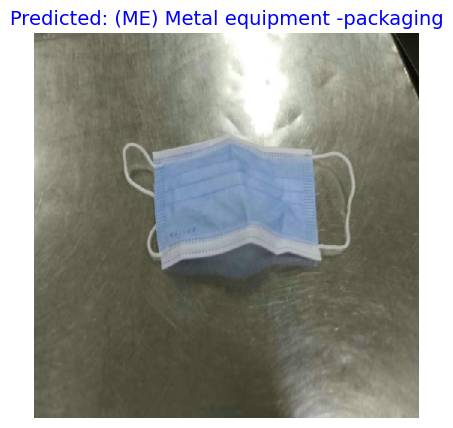

✅ Image: m.jpg → Predicted Class: (ME) Metal equipment -packaging
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
Top Predictions:
(ME) Metal equipment -packaging: 100.00%
Gauze: 0.00%
(OW) Organic wastes: 0.00%


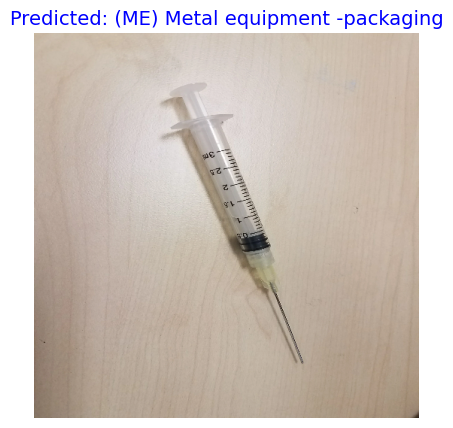

✅ Image: s.webp → Predicted Class: (ME) Metal equipment -packaging
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
Top Predictions:
Syringe: 99.94%
(SN) Syringe needles: 0.03%
(ME) Metal equipment -packaging: 0.01%


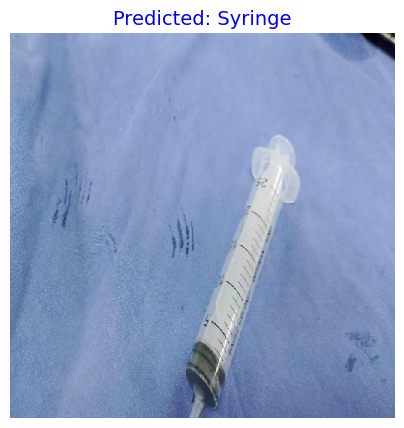

✅ Image: s1.jpg → Predicted Class: Syringe
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
Top Predictions:
(ME) Metal equipment -packaging: 61.31%
Gloves: 15.84%
(BT) Body Tissue or Organ: 6.48%


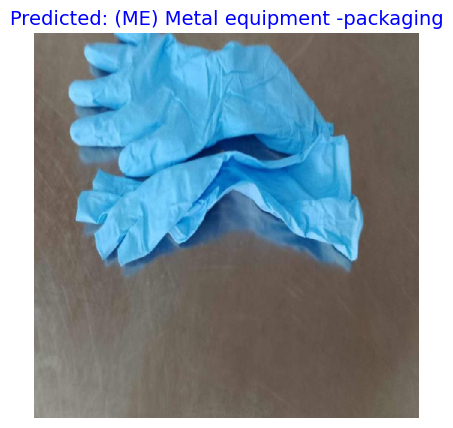

✅ Image: s3.jpg → Predicted Class: (ME) Metal equipment -packaging
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
Top Predictions:
(PE) Plastic equipment-packaging: 79.93%
(GE) Glass equipment-packaging 551: 8.73%
(SN) Syringe needles: 8.10%


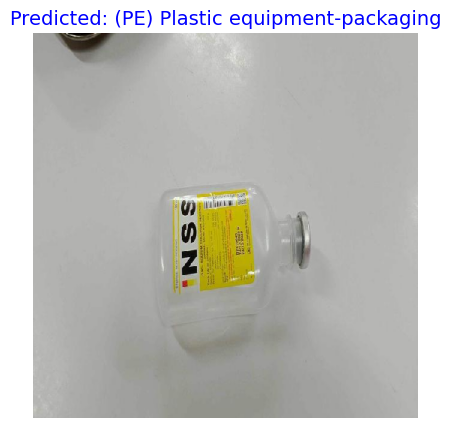

✅ Image: s4.jpg → Predicted Class: (PE) Plastic equipment-packaging
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
Top Predictions:
Gauze: 89.83%
Syringe: 6.67%
(ME) Metal equipment -packaging: 1.12%


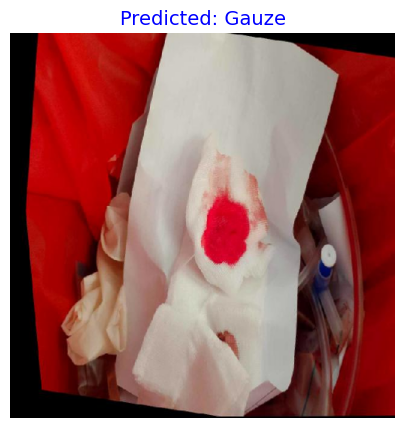

✅ Image: s5.jpg → Predicted Class: Gauze
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
Top Predictions:
(GE) Glass equipment-packaging 551: 37.79%
(SN) Syringe needles: 29.94%
Tweezers: 9.23%


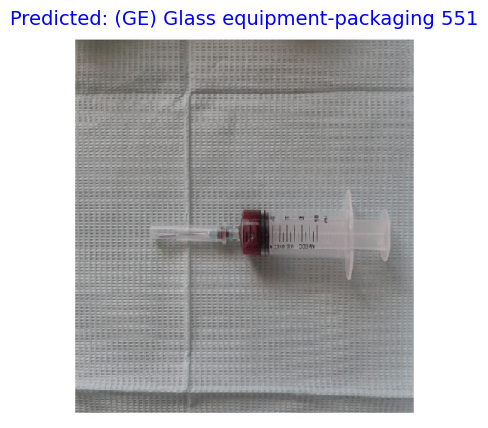

✅ Image: s6.png → Predicted Class: (GE) Glass equipment-packaging 551
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
Top Predictions:
Gauze: 70.54%
(GE) Glass equipment-packaging 551: 12.66%
(PP) Paper equipment-packaging: 6.80%


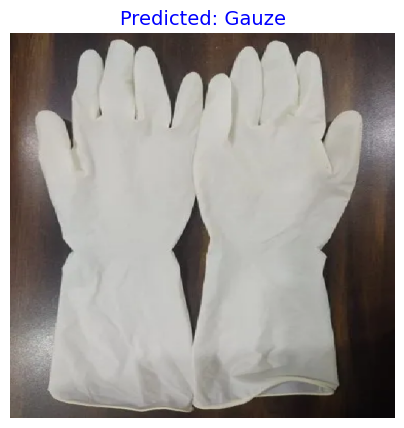

✅ Image: s7.webp → Predicted Class: Gauze


In [105]:

# List of images to predict
image_paths = ["m.jpg" , "s.webp" , "s1.jpg" , "s3.jpg" , "s4.jpg" , "s5.jpg" , "s6.png" , "s7.webp"]  # Update with actual image paths

# Function to predict and display image
def predict_and_show(img_path):
    try:
        # Load image
        img = image.load_img(img_path, target_size=(512, 512))  # Resize image
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = img_array / 255.0  # Normalize

        # Make prediction
        predictions = model.predict(img_array)
        top_3 = np.argsort(predictions[0])[-3:][::-1]  # Get top 3 predictions

        print("Top Predictions:")
        for i in top_3:
            print(f"{CATEGORIES[i]}: {predictions[0][i]*100:.2f}%")
        predicted_class = np.argmax(predictions, axis=1)[0]
        predicted_label = CATEGORIES[predicted_class]

        # Display image
        plt.figure(figsize=(5, 5))
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"Predicted: {predicted_label}", fontsize=14, color="blue")
        plt.show()

        print(f"✅ Image: {img_path} → Predicted Class: {predicted_label}")

    except Exception as e:
        print(f"❌ Error loading image {img_path}: {e}")

# Predict for all images
for img_path in image_paths:
    predict_and_show(img_path)